<a href="https://colab.research.google.com/github/Vinuthna06reddy/VinuthnaReddy_INFO5731_FALL2024/blob/main/INFO5731_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Load dataset
train_data = pd.read_csv('/content/traindata.csv')
test_data = pd.read_csv('/content/testdata.csv')

# Split data into features and labels
X_train_full = train_data['sentiment']
# Ensure y_train_full contains only the target labels (0 or 1)
y_train_full = train_data['sentiment'].apply(lambda x: 1 if x.startswith('1') else 0)
X_test = test_data['review']
# Ensure y_test contains only the target labels (0 or 1)
y_test = test_data['review'].apply(lambda x: 1 if x.startswith('1') else 0)

# Split training data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, stratify=y_train_full, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)
# Initialize classifiers
models = {
    'MultinomialNB': MultinomialNB(),
    'SVM': SVC(kernel='linear', C=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Perform 10-fold cross-validation and evaluate each model
results = {}
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for model_name, model in models.items():
    cross_val_scores = cross_val_score(model, X_train_tfidf, y_train, cv=skf, scoring='accuracy')
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_val_tfidf)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    results[model_name] = {
        'Cross-Validation Accuracy (Mean)': cross_val_scores.mean(),
        'Validation Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1
    }

# Print results
for model, metrics in results.items():
    print(f"Model: {model}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()

# Final evaluation on test data using the best-performing model (e.g., Random Forest)
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train_tfidf, y_train)
y_test_pred = best_model.predict(X_test_tfidf)

# Calculate and display evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Final Test Evaluation (Random Forest):")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  Recall: {test_recall:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  F1 Score: {test_f1:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:30:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:30:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:30:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:30:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:30:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Model: MultinomialNB
  Cross-Validation Accuracy (Mean): 0.7753
  Validation Accuracy: 0.7587
  Recall: 0.8241
  Precision: 0.7419
  F1 Score: 0.7808

Model: SVM
  Cross-Validation Accuracy (Mean): 0.7596
  Validation Accuracy: 0.7558
  Recall: 0.7839
  Precision: 0.7567
  F1 Score: 0.7701

Model: KNN
  Cross-Validation Accuracy (Mean): 0.5146
  Validation Accuracy: 0.5253
  Recall: 0.4515
  Precision: 0.5554
  F1 Score: 0.4981

Model: Decision Tree
  Cross-Validation Accuracy (Mean): 0.6535
  Validation Accuracy: 0.6250
  Recall: 0.6205
  Precision: 0.6465
  F1 Score: 0.6332

Model: Random Forest
  Cross-Validation Accuracy (Mean): 0.7187
  Validation Accuracy: 0.7030
  Recall: 0.7064
  Precision: 0.7193
  F1 Score: 0.7128

Model: XGBoost
  Cross-Validation Accuracy (Mean): 0.6902
  Validation Accuracy: 0.6712
  Recall: 0.7812
  Precision: 0.6551
  F1 Score: 0.7126

Final Test Evaluation (Random Forest):
  Accuracy: 0.7407
  Recall: 0.7255
  Precision: 0.7469
  F1 Score: 0.7360


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

import gensim
from gensim.models import Word2Vec

import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset

train_text_column = 'sentiment'
test_text_column = 'review'

# Apply preprocessing to the correct columns
train_data[train_text_column] = train_data[train_text_column].apply(preprocess)
test_data[test_text_column] = test_data[test_text_column].apply(preprocess)

# Preprocess the data
def preprocess(text):
    # Add your preprocessing steps here, e.g., tokenization, stop word removal, etc.
    return text

train_data['processed_text'] = train_data[train_text_column].apply(preprocess) # Creating new 'processed_text' column
test_data['processed_text'] = test_data[test_text_column].apply(preprocess)  # Creating new 'processed_text' column

# Word2Vec Model
def train_word2vec_model(sentences):
    model = Word2Vec(sentences, min_count=1, size=100, window=5)
    return model

def create_word2vec_features(model, sentences):
    features = []
    for sentence in sentences:
        sentence_vec = np.zeros(100)
        count = 0
        for word in sentence:
            if word in model.wv.vocab:
                sentence_vec += model.wv[word]
                count += 1
        if count > 0:
            sentence_vec /= count
        features.append(sentence_vec)
    return np.array(features)

# BERT Model
def tokenize_data(tokenizer, sentences, max_length=512):
    input_ids = []
    attention_masks = []
    for sentence in sentences:
        encoded_dict = tokenizer.encode_plus(
            sentence,
            add_special_tokens=True,
            truncation=True,
            max_length=max_length,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
    return np.array(input_ids), np.array(attention_masks)

# Train and evaluate models using 10-fold cross-validation
def train_and_evaluate(X, y, model_type='word2vec'):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        if model_type == 'word2vec':
            # Train Word2Vec model
            sentences = [sentence.split() for sentence in X_train]
            model = train_word2vec_model(sentences)

            # Create Word2Vec features
            X_train_features = create_word2vec_features(model, X_train)
            X_val_features = create_word2vec_features(model, X_val)

            # Train a classifier (e.g., Logistic Regression, SVM, etc.)
            # ...

        elif model_type == 'bert':
            # Tokenize data
            tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
            X_train_tokens, X_train_masks = tokenize_data(tokenizer, X_train)
            X_val_tokens, X_val_masks = tokenize_data(tokenizer, X_val)

            # Create PyTorch datasets and dataloaders
            train_dataset = TensorDataset(torch.tensor(X_train_tokens), torch.tensor(X_train_masks), torch.tensor(y_train))
            val_dataset = TensorDataset(torch.tensor(X_val_tokens), torch.tensor(X_val_masks), torch.tensor(y_val))

            # Load pre-trained BERT model
            model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

K-Means Silhouette Score: 0.1939


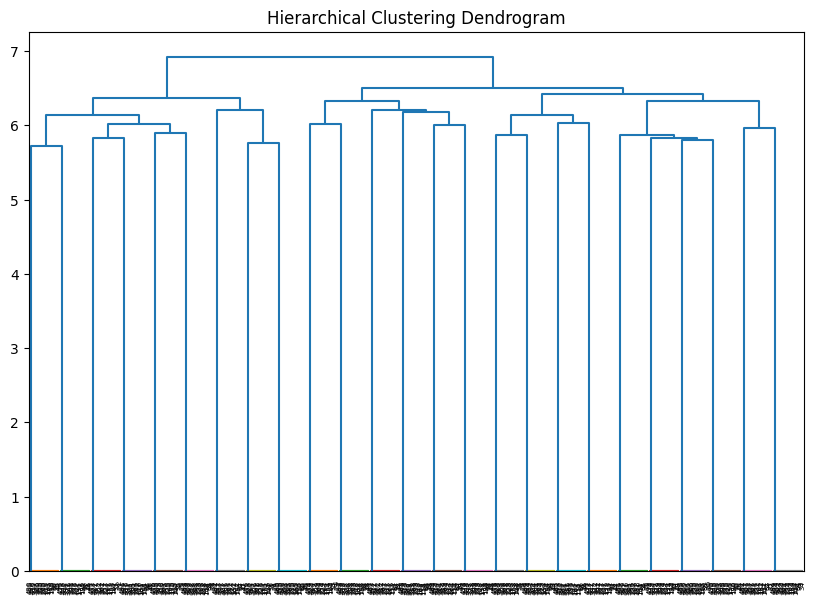


 Hierarchical Clustering Silhouette Score: 0.1997

 Word2Vec K-Means Silhouette Score: 0.3291

 BERT K-Means Silhouette Score: 0.1894

 DBSCAN Silhouette Score: 1.0



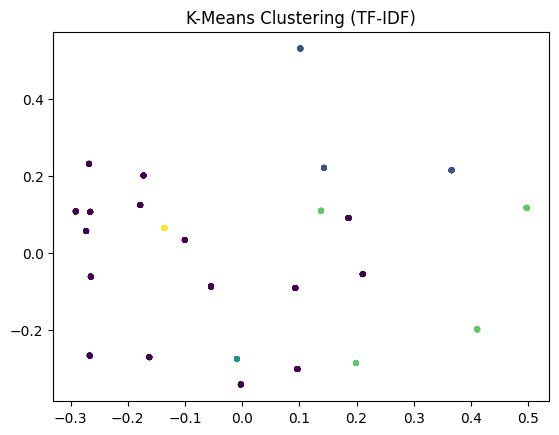

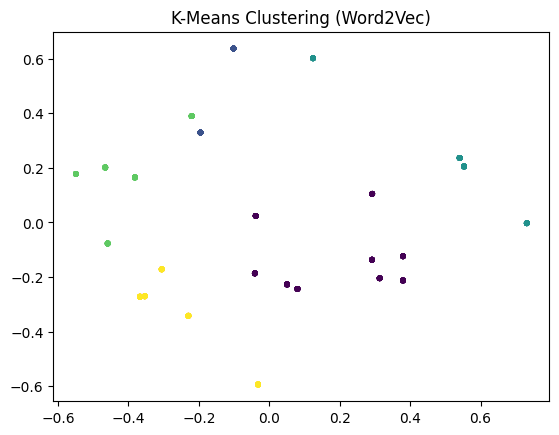

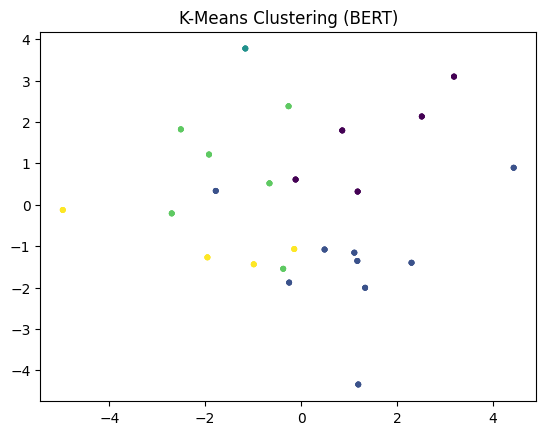

In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.utils import resample


try:
    # Load dataset and handle potential parsing issues
    data = pd.read_csv('/content/final_cleaned_imdb_reviews.csv', on_bad_lines='skip', encoding='utf-8')
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

actual_column_name = None

if 'cleaned_reviews' not in data.columns:
    # Assume the actual column name may be slightly different.
    # Replace 'actual_column_name' with the actual column name or use a fuzzy matching technique if needed.
    # Check for potential variations in column names like 'Review Text', 'review_text', etc.
    potential_column_names = ['Review Text', 'review_text', 'review', 'reviews'] #add possible column names here
    for col_name in potential_column_names:
        if col_name in data.columns:
            actual_column_name = col_name
            break  # Exit loop if found

    if actual_column_name is None:  # Check if the loop couldn't find a match
        print("Could not find the appropriate review text column. Please check the CSV file.")
        print(f"Available columns: {data.columns}")
        exit()
    data = data[[actual_column_name]].dropna()
else:
    data = data[['cleaned_reviews']].dropna()

data.columns = ['text']  # Rename for simplicity

# ... (rest of your code remains the same)
# Basic text preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join(char for char in text if char.isalnum() or char.isspace())  # Remove special characters
    return text

data['text'] = data['text'].apply(preprocess_text)

# --- Vectorization using TF-IDF ---
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['text'])

# --- Sampling for Silhouette Score ---
def compute_silhouette_score(features, labels, sample_size=1000):
    if features.shape[0] > sample_size:
        features_sample, labels_sample = resample(features, labels, n_samples=sample_size, random_state=42)
    else:
        features_sample, labels_sample = features, labels
    return silhouette_score(features_sample, labels_sample)

# --- K-Means Clustering ---
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tfidf)
silhouette_kmeans = compute_silhouette_score(X_tfidf, kmeans_labels)
print(f"K-Means Silhouette Score: {silhouette_kmeans:.4f}")

# --- Hierarchical Clustering ---
linkage_matrix = linkage(X_tfidf.toarray()[:500], method='ward')  # Use a sample to avoid memory issues
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

hierarchical_labels = fcluster(linkage_matrix, t=5, criterion='maxclust')
silhouette_hierarchical = silhouette_score(X_tfidf[:500], hierarchical_labels)  # Use a sample
print(f"\n Hierarchical Clustering Silhouette Score: {silhouette_hierarchical:.4f}")

# --- Word2Vec Clustering ---
sentences = [text.split() for text in data['text']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word_embeddings = np.array([
    np.mean([word2vec_model.wv[word] for word in text.split() if word in word2vec_model.wv] or [np.zeros(100)], axis=0)
    for text in data['text']
])

# K-means on Word2Vec embeddings
kmeans_w2v = KMeans(n_clusters=5, random_state=42)
w2v_labels = kmeans_w2v.fit_predict(word_embeddings)
silhouette_w2v = silhouette_score(word_embeddings, w2v_labels)
print(f"\n Word2Vec K-Means Silhouette Score: {silhouette_w2v:.4f}")

# --- BERT Clustering ---
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(text_list, tokenizer, model):
    embeddings = []
    for text in text_list:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
        outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state[:, 0, :].detach().numpy())
    return np.vstack(embeddings)

bert_embeddings = get_bert_embeddings(data['text'][:100].tolist(), bert_tokenizer, bert_model)  # Sample for speed

# K-means on BERT embeddings
kmeans_bert = KMeans(n_clusters=5, random_state=42)
bert_labels = kmeans_bert.fit_predict(bert_embeddings)
silhouette_bert = silhouette_score(bert_embeddings, bert_labels)
print(f"\n BERT K-Means Silhouette Score: {silhouette_bert:.4f}")

# --- Visualization using PCA ---
def visualize_clusters(data, labels, title):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(title)
    plt.show()

# --- DBSCAN Clustering ---
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
dbscan_labels = dbscan.fit_predict(X_tfidf)
if len(set(dbscan_labels)) > 1:  # Check to avoid errors with single clusters
    silhouette_dbscan = compute_silhouette_score(X_tfidf, dbscan_labels)
else:
    silhouette_dbscan = 'N/A'
print(f"\n DBSCAN Silhouette Score: {silhouette_dbscan}\n")

visualize_clusters(X_tfidf.toarray(), kmeans_labels, "K-Means Clustering (TF-IDF)")
visualize_clusters(word_embeddings, w2v_labels, "K-Means Clustering (Word2Vec)")
visualize_clusters(bert_embeddings, bert_labels, "K-Means Clustering (BERT)")

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**



```
# This is formatted as code
```

**Write your response here:**
Traditional clustering techniques K-means, DBSCAN, and Hierarchical clustering operate on distinct concepts.
 K-means, which is centroid-based, works well with spherical data but has trouble with non-globular geometries.
 In contrast to K-means, DBSCAN is excellent at tolerating noise and can identify clusters of any shape.
 Unlike K-means, hierarchical clustering does not require the number of groups a prior and instead creates a dendrogram to illustrate data linkages.
 Word2Vec provides data for additional analysis, such as K-means, by converting words into dense vectors that contain semantic meanings. It is not a clustering technique in and of itself.
 In contrast, BERT use deep learning to extract contextual information from text, providing more sophisticated embeddings that surpass Word2Vec in terms of text semantics comprehension.




.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''







'''